<div class="clearfix" style="padding: 10px; padding-left: 0px">
<a href="https://www.unicamp.br/"><img src="http://www.fee.unicamp.br/sites/all/themes/theme537/images/unicamp.png" width="100px" style="display: inline-block; margin-top: 5px;"></a>
<a href="https://www.fee.unicamp.br/"><img src="http://www.fee.unicamp.br/sites/default/files/imagens/logo_feec_50anos_juntos.png" width="150px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>

## IE325Z - Introdução à Confiabilidade de Materiais e Dispositivos
## Lista 1 - Exercício 4

<br>

|Alunos   	|RA   	|e-mail   	|
|:-:	|:-:	|:-:	|
|Patricia Henriques Nallin  	|103717   	|patricia.nallin@gmail.com   	| 
|Mauricio Martins Donatti  	|092374   	|mmdonatti@gmail.com   	| 



|Professor     	|e-mail   	|
|:-:	|:-:	|
|Prof. Roberto Lacerda de Orio | orio@dsif.fee.unicamp.br |

### Instruções de Uso

Para rodar um trecho de código:

1. Clique para selecionar a célula
2. Aperte `SHIFT+ENTER` no teclado ou clique no botão (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) na barra superior da página.

### Enunciado
<br>
<div style="text-align: justify">O tamanho de um tumor cerebral inoperável foi monitorado por 3 meses antes do uso de uma droga experimental e por 3 meses após o uso de tal droga. Os dados são mostrados abaixo.</div>

|Tempo(meses)|Tamanho(cm)|
|:-:	|:-:	|
|0|1.00|
|1|1.10|
|2|1.20|
|3|1.30|
|Introdução da droga|
|3|1.30|
|4|1.43|
|5|1.48|
|6|1.52|

<br><div style="text-align: justify">a) Determine a equação potencial que descreve o crescimento do tumor antes e depois do uso da droga experimental.
<br>
b) Através da relação entre as duas taxas de crescimento determine se a droga experimental foi efetiva na redução da taxa de crescimento do tumor.
<br>
c) Calcule em quanto tempo o tumor cresce para 1,6 cm.</div>

---

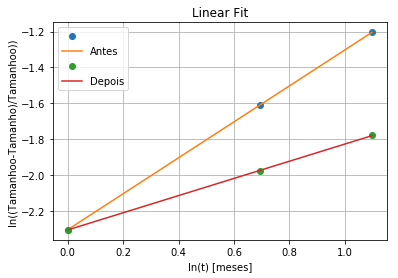

In [2]:
import matplotlib.pyplot as plt
import notebook_importer
from modules import IE325


# ----- Dados
tempo_meses_antes = [0, 1, 2, 3]
tempo_meses_depois = [3, 4, 5, 6]
tamanho_cm_antes = [1.0, 1.1, 1.2, 1.3]
tamanho_cm_depois = [1.3, 1.43, 1.48, 1.52]


PL_antes = IE325.PowerLaw(tempo_meses_antes, tamanho_cm_antes)
PL_depois = IE325.PowerLaw(tempo_meses_depois, tamanho_cm_depois, deltaT = 3)



# ----- Dados linearizados
xlin_antes,ylin_antes = PL_antes.LinearData()
xlin_depois,ylin_depois = PL_depois.LinearData()

# ----- Plot Linear Fit
plt.plot(xlin_antes, ylin_antes, 'o', xlin_antes, PL_antes.LinearFit(),
        xlin_depois, ylin_depois, 'o', xlin_depois, PL_depois.LinearFit())
plt.title('Linear Fit')
plt.xlabel('ln(t) [meses]')
plt.ylabel('ln((Tamanhoo-Tamanho)/Tamanhoo))')
plt.legend(["","Antes","","Depois"])
plt.grid()
plt.show() 

---
** EQUAÇÃO POTENCIAL ANTES DA DROGA**:

(para t <= 3 meses)


In [3]:
print ("Tamanho(t) = " + PL_antes.LawComplete(decimal = 1) + " [cm]")
print ("Tamanho(t) = " + PL_antes.LawSimple(decimal = 1) + " [cm]")

Tamanho(t) = 1.0 * (1 + 1.0e-01 * t^1.0e+00) [cm]
Tamanho(t) = 1.0 + 1.0e-01 * t^1.0e+00 [cm]


**EQUAÇÃO POTENCIAL DEPOIS DA DROGA**:

(para t >= 3 meses)

In [4]:
print ("Tamanho(t) = " + PL_depois.LawComplete(decimal = 2) + " [cm]")
print ("Tamanho(t) = " + PL_depois.LawSimple(decimal = 2) + " [cm]")

Tamanho(t) = 1.3 * (1 + 9.98e-02 * (t - 3)^4.78e-01) [cm]
Tamanho(t) = 1.3 + 1.30e-01 * (t - 3)^4.78e-01) [cm]


---
##### Plot dos Dados Originais e das funções de potência correspondentes

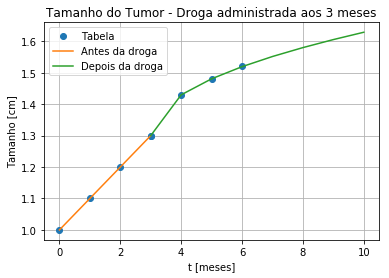

In [5]:
# ----- Plot do Dados Originais
plt.plot(tempo_meses_antes + tempo_meses_depois, tamanho_cm_antes + tamanho_cm_depois, 'o',
         tempo_meses_antes, PL_antes.Find_S(tempo_meses_antes),
         tempo_meses_depois + [7, 8, 9, 10], PL_depois.Find_S(tempo_meses_depois+ [7, 8, 9, 10]))
plt.title('Tamanho do Tumor - Droga administrada aos 3 meses')
plt.xlabel('t [meses]')
plt.ylabel('Tamanho [cm]')
plt.legend(["Tabela","Antes da droga","Depois da droga"])
plt.grid()
plt.show() 

---
** TAXA DE CRESCIMENTO ANTES DA DROGA**:

Coeficiente A da derivada de S em relação à t

In [6]:
print (str(PL_antes.Law_dSdt()[0]) + " cm/mês") 

0.1 cm/mês


** TAXA DE CRESCIMENTO DEPOIS DA DROGA**:

Coeficiente A da derivada de S em relação à t

In [7]:
print (format(PL_depois.Law_dSdt()[0],'.3f') + " cm/mês") 

0.062 cm/mês


Assim, podemos concluir que a administração da droga **foi efetiva** no tratamento, visto que diminuiu a taxa de crescimento do tumor.

---
Para calcular em quanto tempo o tumor cresce para 1.6cm, deve-se utilizar a lei de potência após a droga. Assim, para S = 1.6:

In [8]:
print (PL_depois.Find_t(1.6))

8.77339520117


Portanto, o tumor terá tamanho de **1.6cm** após **8.77 meses** desde o início do monitoramento (5.77 meses após a administração da droga experimental)


---

##### Variáveis Associadas

In [9]:
print(PL_antes.Variables())



Linear Fit Variables - Power Law:

a (slope coef) = 1.0
b (intercept coef) = -2.30258509299
r_value (correlation coefficient) = 1.0
std_err (standard error) = 0.0


Power Law Variables:

Ao = 0.1
n = 1.0



In [10]:
print(PL_depois.Variables())



Linear Fit Variables - Power Law:

a (slope coef) = 0.477859945667
b (intercept coef) = -2.30414995509
r_value (correlation coefficient) = 0.99990217014
std_err (standard error) = 0.00668471984222


Power Law Variables:

Ao = 0.0998436361664
n = 0.477859945667

